In [1]:
import prody as prd, numpy as np, pandas as pd

In [2]:
NMR_prot = prd.parsePDB("6L7K")
xray_model = prd.parsePDB("3AKM", chain="A")

@> Connecting wwPDB FTP server RCSB PDB (USA).
@> 6l7k downloaded (C:\Users\User\...\6l7k.pdb.gz)
@> PDB download via FTP completed (1 downloaded, 0 failed).
@> 2109 atoms and 20 coordinate set(s) were parsed in 0.11s.
@> Connecting wwPDB FTP server RCSB PDB (USA).
@> 3akm downloaded (C:\Users\User\...\3akm.pdb.gz)
@> PDB download via FTP completed (1 downloaded, 0 failed).
@> 1122 atoms and 1 coordinate set(s) were parsed in 0.02s.


In [3]:
nmr_inds = [res.getResnum() for res in NMR_prot.iterResidues()]
xray_inds = [res.getResnum() for res in xray_model.iterResidues()]

In [4]:
inds = list(set(nmr_inds) & set(xray_inds))
RMSFs = []
betas = []
for res in NMR_prot.iterResidues():
    if (res.getResnum() in inds): 
        RMSFs.append(np.mean(prd.calcRMSF(res)))
for res in xray_model.iterResidues():
    if (res.getResnum() in inds):
        betas.append(np.mean(res.getBetas()))

Text(0.5, 1.0, 'B-фактор и RMSF')

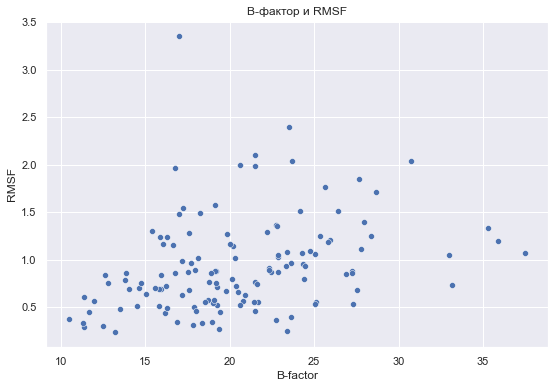

In [14]:
import seaborn as sns, matplotlib.pyplot as plt
plot = sns.scatterplot(x=betas, y=RMSFs)
plot.set_xlabel('B-factor')
plot.set_ylabel('RMSF')
plot.set_title("B-фактор и RMSF")

In [6]:
from scipy.stats import spearmanr
spearmanr(betas, RMSFs)

SpearmanrResult(correlation=0.3954892435808466, pvalue=2.9358515277937594e-06)

In [8]:
ss_bb = []
ss_rad = []
surf_rad = [] 
res11 = NMR_prot["A", 116]["O"].getCoordsets()
res12 = NMR_prot["A", 105]["N"].getCoordsets()
res21 = NMR_prot["A", 115]["NE2"].getCoordsets()
res22 = NMR_prot["A", 104]["OG1"].getCoordsets()
res31 = NMR_prot["A", 98]["ND2"].getCoordsets()
res32 =  NMR_prot["A", 119]["OH"].getCoordsets()
for i in range(20):
    ss_bb.append(prd.calcDistance(res11[i], res12[i]))
    ss_rad.append(prd.calcDistance(res21[i], res22[i])) 
    surf_rad.append(prd.calcDistance(res31_2[i], res32[i]))

In [18]:
max_value = [round(np.max(ss_bb), 3), round(np.max(ss_rad), 3), round(np.max(surf_rad), 3)]
min_value = [round(np.min(ss_bb), 3), round(np.min(ss_rad), 3), round(np.min(surf_rad), 3)]
median_value = [round(np.median(ss_bb), 3), round(np.median(ss_rad), 3), round(np.median(surf_rad), 3)]
xray_len = [2.6, 3.3, 3.4]
pd.DataFrame({"XRay": xray_len,
             "Min": min_value,
             "Max": max_value, "Med": median_value})

XRay    Min    Max    Med
0   2.6  2.624  2.710  2.659
1   3.3  4.118  7.273  5.346
2   3.4  6.228  9.035  7.585

In [13]:
ss_bb_pr = 0
ss_rad_pr = 0
surf_rad_pr = 0
for i in range(20):
    if ss_bb[i] < 3.5:
        ss_bb_pr+=1
    if ss_rad[i] < 3.5:
        ss_rad_pr+=1
    if surf_rad[i] < 3.5:
        surf_rad_pr+=1
print(ss_bb_pr,ss_rad_pr,surf_rad_pr)

20 0 0
